In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gym import spaces
# from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# fig, ax = plt.subplots()
# from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)

# import cv2 as cv
# from matplotlib import pyplot as plt
# from resizeimage import resizeimage

# img = cv.imread("https://w7.pngwing.com/pngs/915/345/png-transparent-multicolored-balloons-illustration-balloon-balloon-free-balloons-easter-egg-desktop-wallpaper-party-thumbnail.png")
# #cv.rectangle(img,(29,2496),(604,2992),(255,0,0),5)
# plt.imshow(img)

## Question 1

### Deterministic Environment

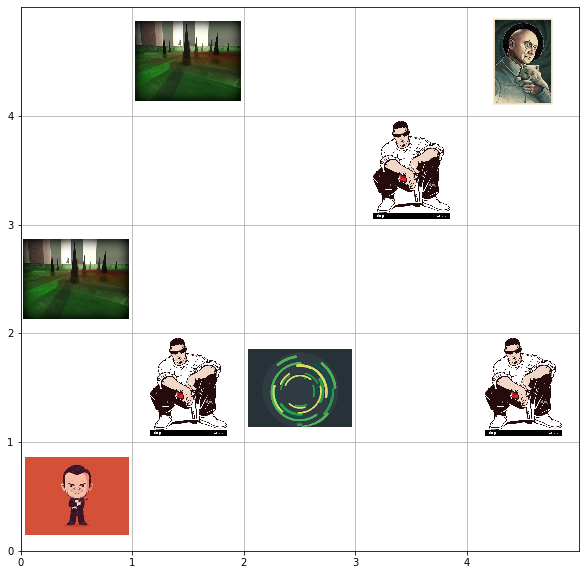

In [3]:
from deterministic_env import GridEnvironment as GridEnvironmentDeterministic
env = GridEnvironmentDeterministic()
obs = env.reset()
env.render()

Action:  1


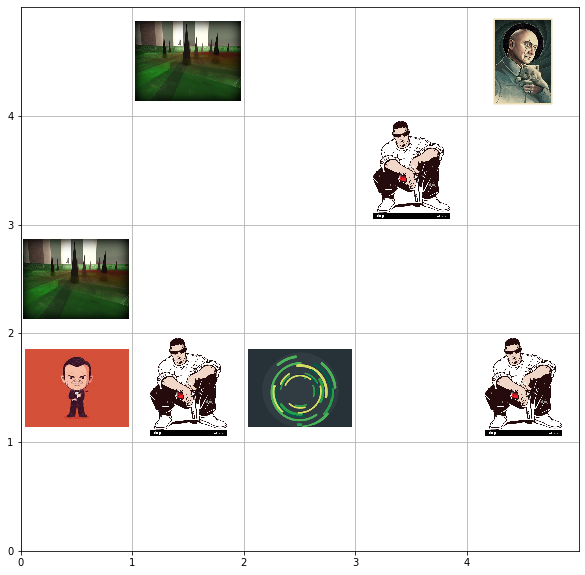

Reward:  -1
Action:  1


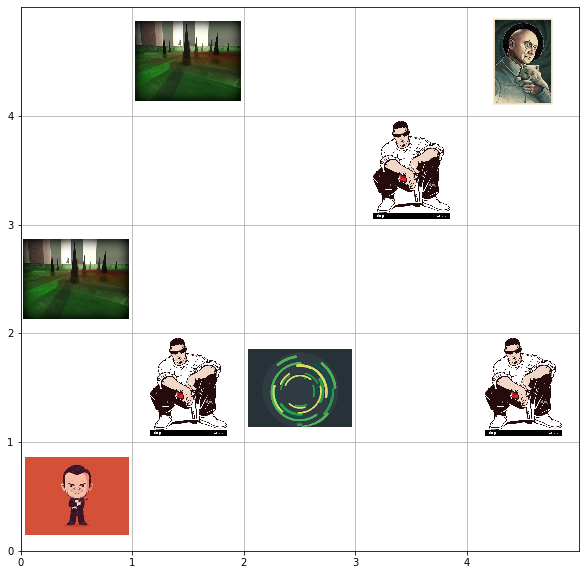

Reward:  -21
Action:  3


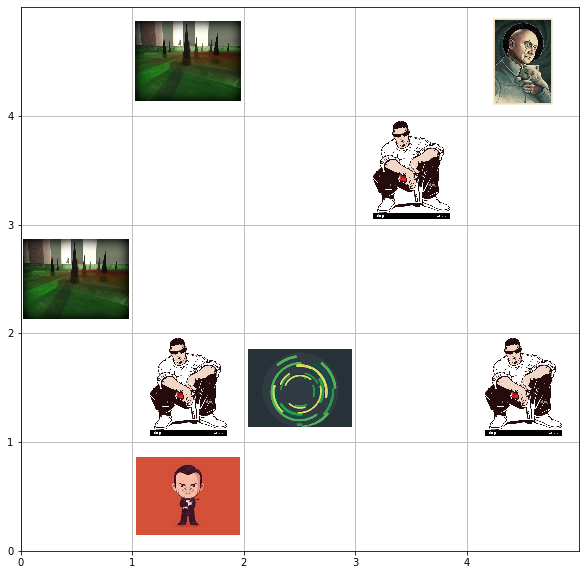

Reward:  -1
Action:  1


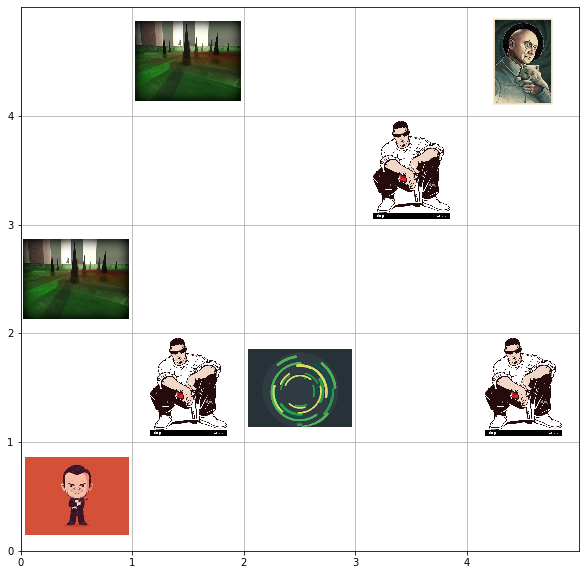

Reward:  -21
Action:  4


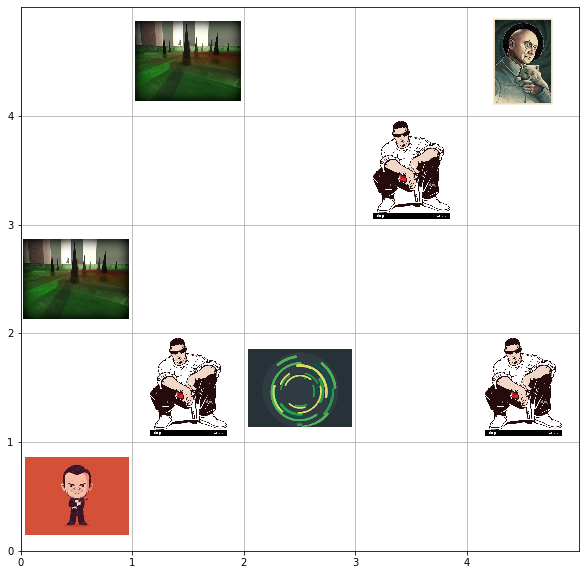

Reward:  -1
Action:  3


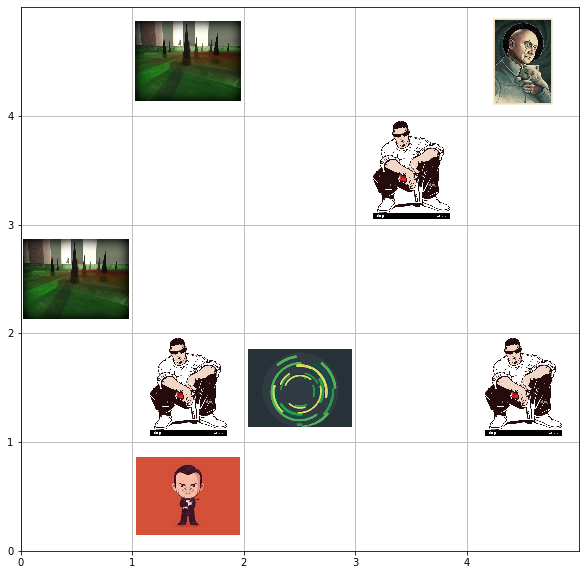

Reward:  -1
Action:  2


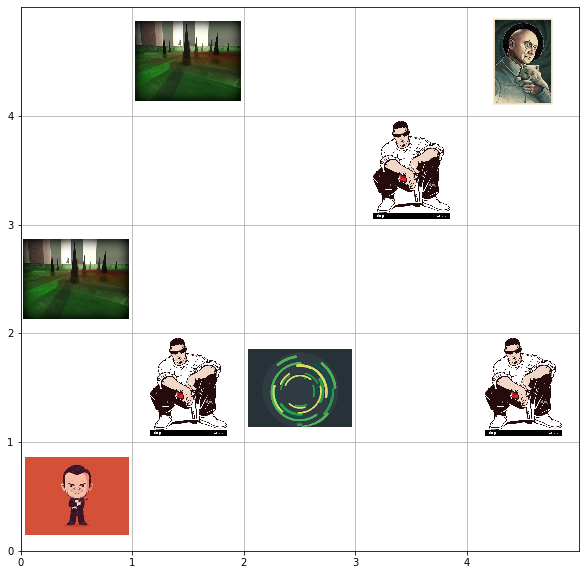

Reward:  -1
Action:  0


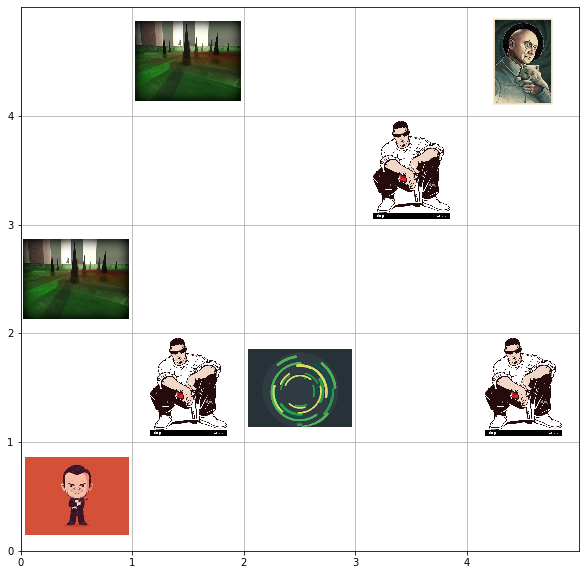

Reward:  -1
Action:  1


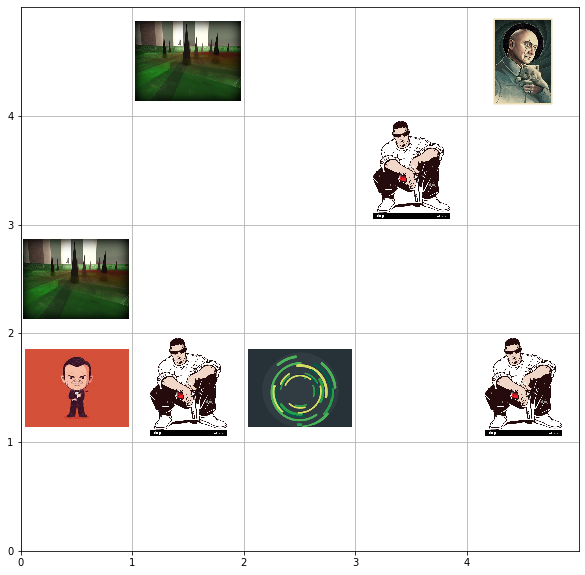

Reward:  -1
Action:  1


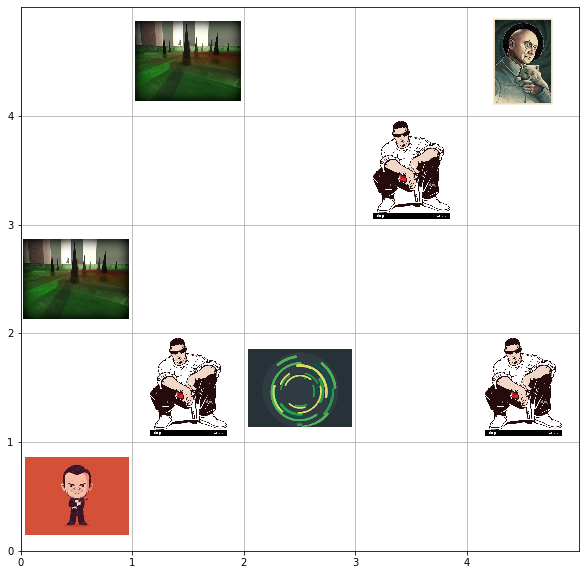

Reward:  -21


In [4]:
ts = 10
for k in range(ts):
    action = np.random.randint(0,5)
    print('Action: ', action)
    observation, reward, done, _ = env.step(action)
    env.render()
    print('Reward: ', reward)


### STOCHASTIC ENVIRONMENT

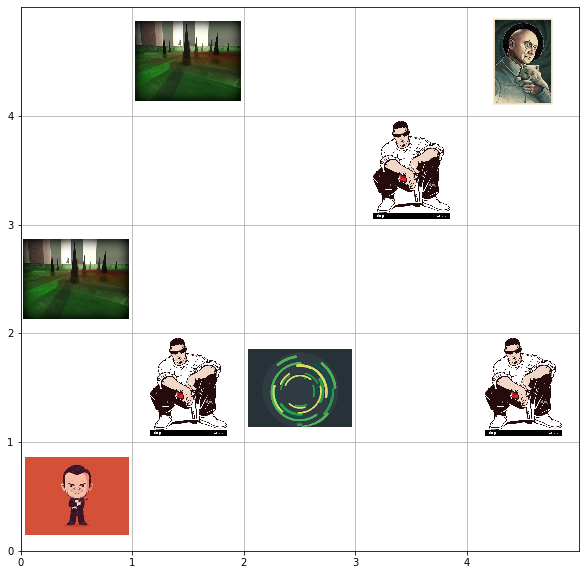

In [5]:
from stochastic_env import GridEnvironment as GridEnvironmentStochastic
env = GridEnvironmentStochastic()
obs = env.reset()
env.render()

Action:  2


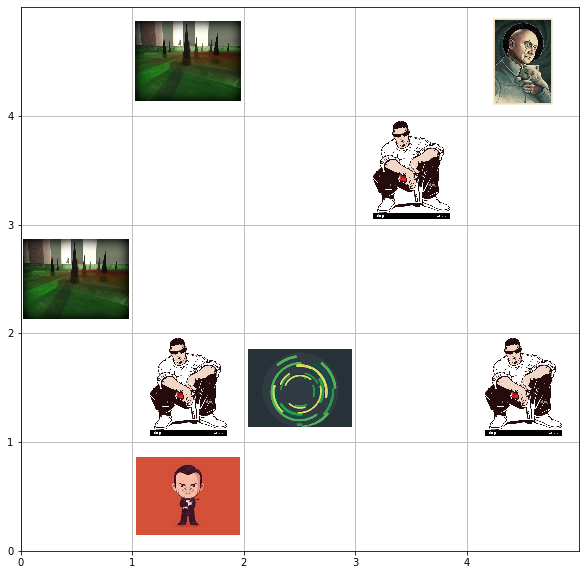

Reward:  -1
Action:  3


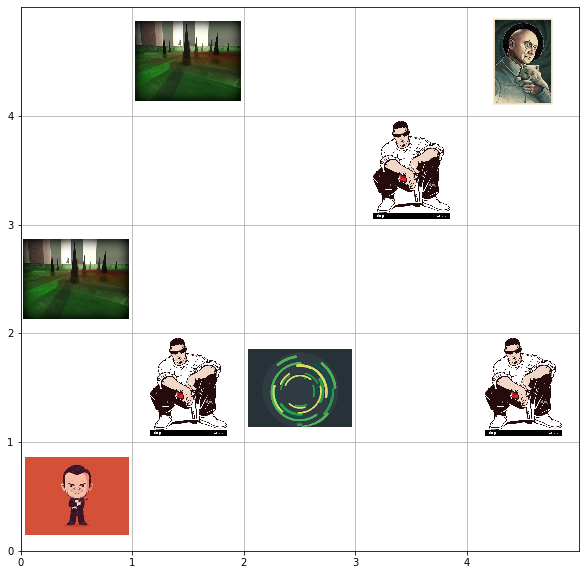

Reward:  -1
Action:  1


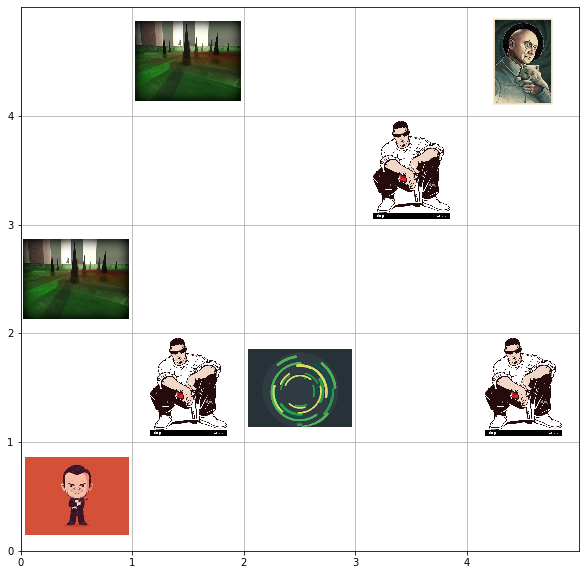

Reward:  -1
Action:  0


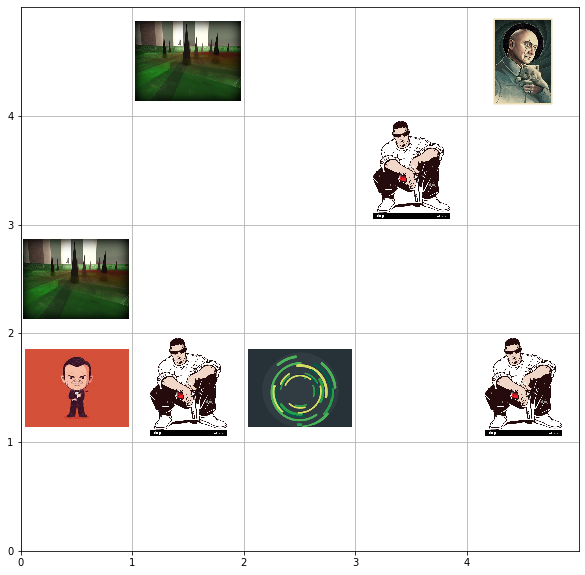

Reward:  -1
Action:  3


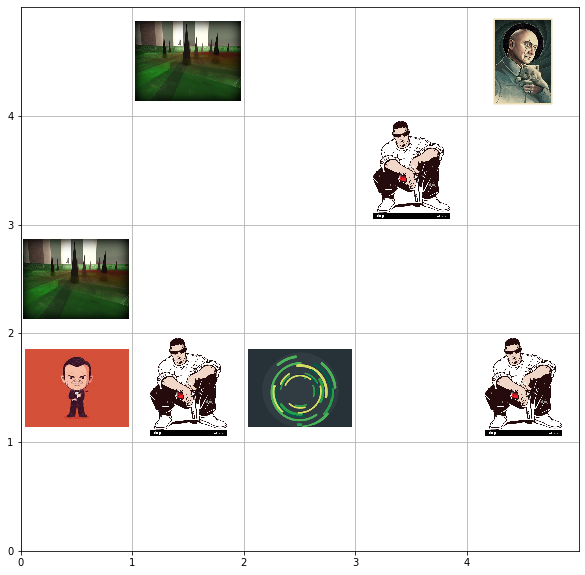

Reward:  -1
Action:  1


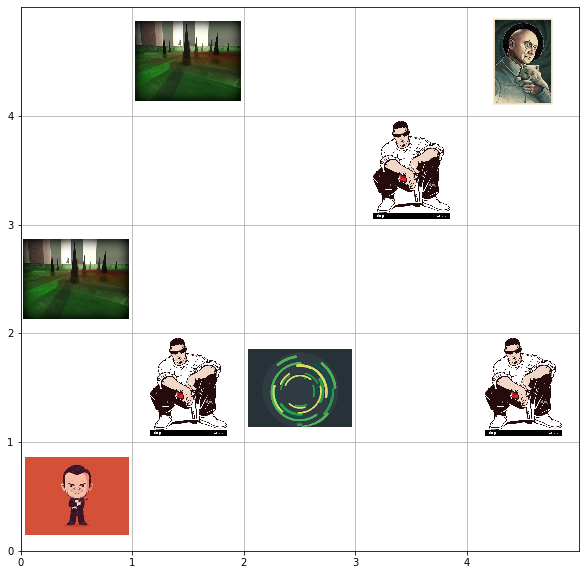

Reward:  -1
Action:  1


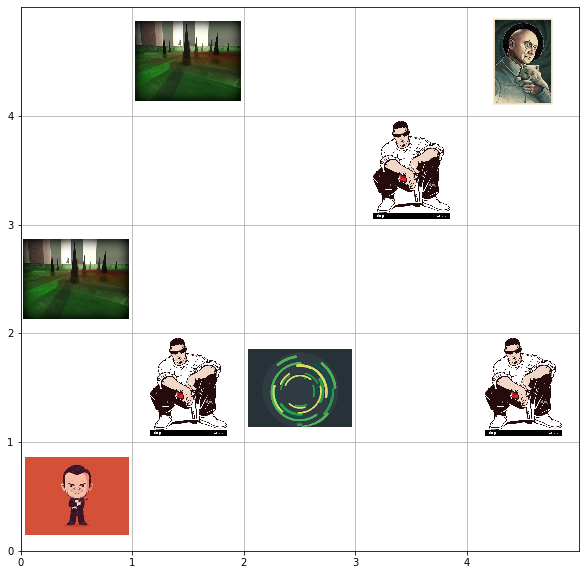

Reward:  -1
Action:  3


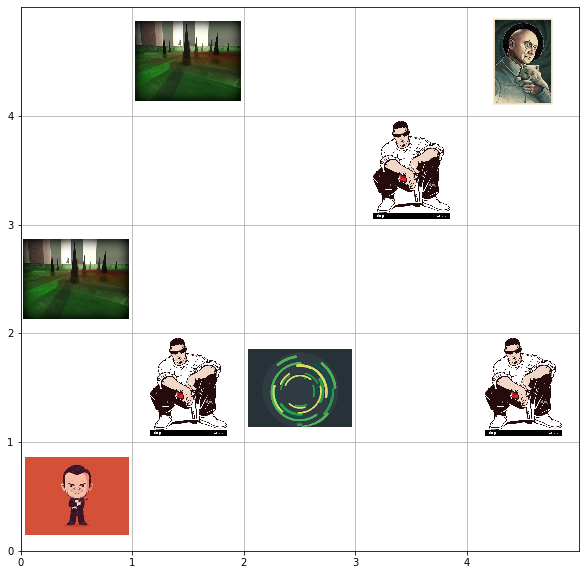

Reward:  -1
Action:  3


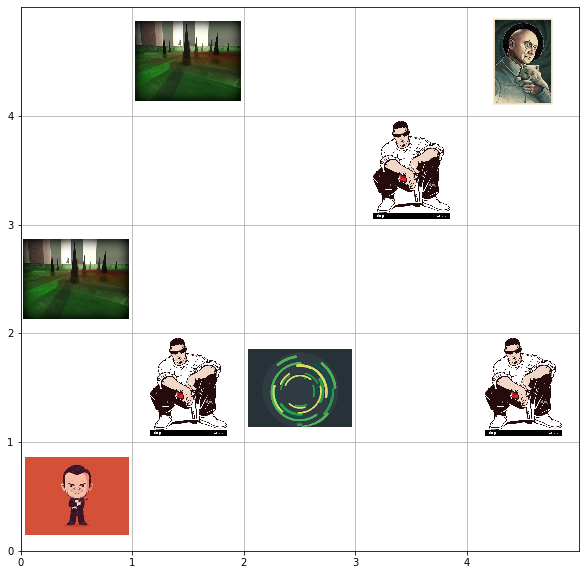

Reward:  -1
Action:  2


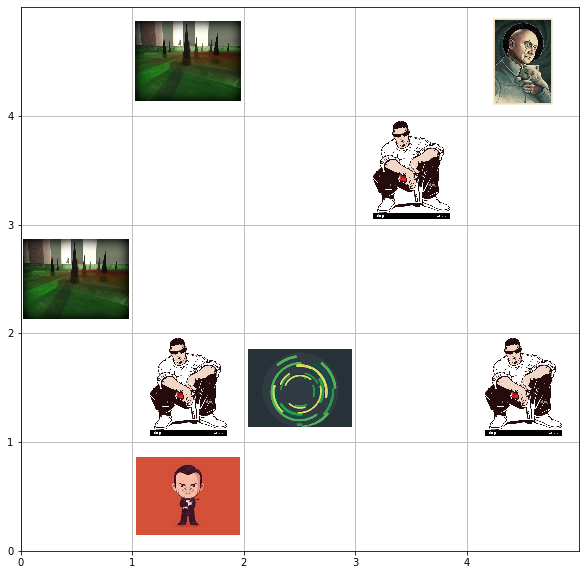

Reward:  -1


In [6]:
ts = 10
for k in range(ts):
    action = np.random.randint(0,5)
    print('Action: ', action)
    observation, reward, done, _ = env.step(action)
    env.render()
    print('Reward: ', reward)

In [7]:
del env

## Question 2

In [8]:
class Agent():
    def __init__(self, state_size:int, action_size:int):
        self.q_func = np.zeros((state_size, action_size))
        # print(self.q_func.shape)

    def act(self, state, epsilon=0.1):
        av = self.q_func[state,:]
        prob = np.zeros(len(av))+(epsilon/len(av))
        maxv = np.max(av)==av
        prob += maxv*(1-epsilon)/np.sum(maxv)
        action = np.random.choice(len(av),p=prob)
        return action

In [9]:
def evaluate(env, agent, iters=10):
    rewards = []
    epl = []
    for _ in range(iters):
        l=0
        total_rew = 0
        st = env.reset()
        act = agent.act(st,0)
        while True:
            nxt_st, rew, done, _ = env.step(act)
            nxt_act = agent.act(nxt_st,0)
            act = nxt_act
            st = nxt_st
            total_rew += rew
            l+=1
            if done:
                break
        epl.append(l)
        rewards.append(total_rew)
    return np.mean(rewards), np.mean(epl)

In [10]:
def plot(rewards, train_rewards, epsilon, filename="output_images/demo.png"):
    x = np.arange(len(rewards))
    plt.rcParams['figure.figsize'] = [15, 5]
    plt.rcParams['figure.dpi'] = 100
    plt.subplot(131)
    plt.plot(x, train_rewards, label="train rewards")
    plt.xlabel("Rollout Episodes")
    plt.ylabel("Train reward per episode")
    plt.title("Train Rewards Plot")

    plt.subplot(132)
    plt.plot(x, epsilon, label="epsilon")
    plt.xlabel("Rollout Episodes")
    plt.ylabel("Epsilon")
    plt.title("Epsilon")

    plt.subplot(133)
    plt.plot(x, rewards, label="test rewards")
    plt.xlabel("Rollout Episodes")
    plt.ylabel("Average Reward over 10 episodes")
    plt.title("Greedy Evaluation Rewards")

    plt.savefig(filename)
    # plt.show()
    plt.close()


### Q-Learning

In [32]:
def Qtrainer(env, agent, iters=1000, gamma=0.9, alpha=0.3, epsilon=0.1):
    rewards = []
    train_rewards = []
    epsilons = []
    epsilon_decay = 0.9
    epsilon_min = 0.01
    for i in range(iters):
        st = env.reset()
        total_rew=0
        while True:
            act = agent.act(st, epsilon)
            nxt_st, rew, done, _ = env.step(act)
            # nxt_act = agent.act(nxt_st, epsilon)
            target = rew + gamma*np.max(agent.q_func[nxt_st])*(1-done)
            agent.q_func[st][act] += alpha * (target - agent.q_func[st][act])
            # act = nxt_act
            st = nxt_st
            
            total_rew += rew
            if done:
                break
        train_rewards.append(total_rew)
        # if (i%1==0):
        r,l=evaluate(env,agent,10)
        rewards.append(r)
        epsilons.append(epsilon)
        epsilon = max(epsilon*epsilon_decay, epsilon_min)
    
    return rewards, train_rewards, epsilons


#### Deterministic Q-learning

[[ -1.76032863  -1.88901732  -2.0271905   35.11019255  -2.01783178]
 [ -2.01281202 -11.1729555   -1.49102696  -6.3         -1.49102696]
 [  0.           0.           0.           0.           0.        ]
 [-11.46866693  -0.51        -0.5991      -1.05015484  -0.5991    ]
 [ -0.3         -0.3         -0.3         -6.80293941   0.        ]
 [ -0.8973027  -14.4515054   -1.24131892  41.0709301   -0.89369582]
 [  0.           0.           0.           0.           0.        ]
 [ -6.7169048   -0.72384     -6.495129    -0.59556234  -0.5991    ]
 [ -1.14411766  -6.71481185  -1.033821    -1.08127708  -1.14970359]
 [  0.           0.           0.           0.           0.        ]
 [ -0.3         45.06939196  -0.3          0.          -0.11929629]
 [  0.           0.           0.           0.           0.        ]
 [  0.41496752  -1.50351708  -0.91825744  -1.16077962  -0.66000764]
 [ -0.59021264  45.62106262  -1.6795914  -17.0381197   -1.53212934]
 [ -0.72492287   3.41629916 -11.41974377  47.435

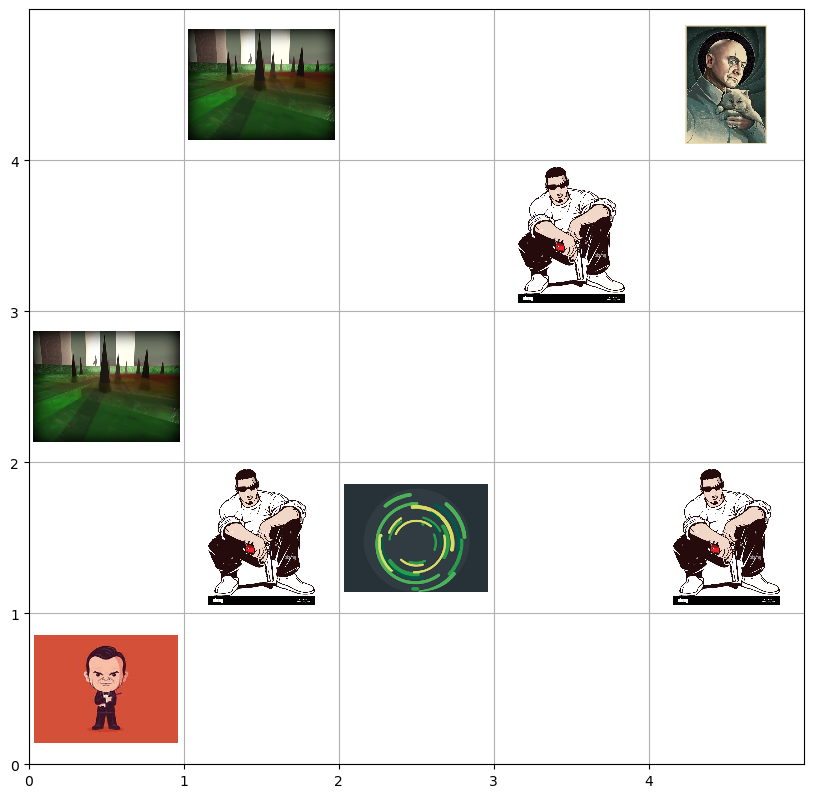

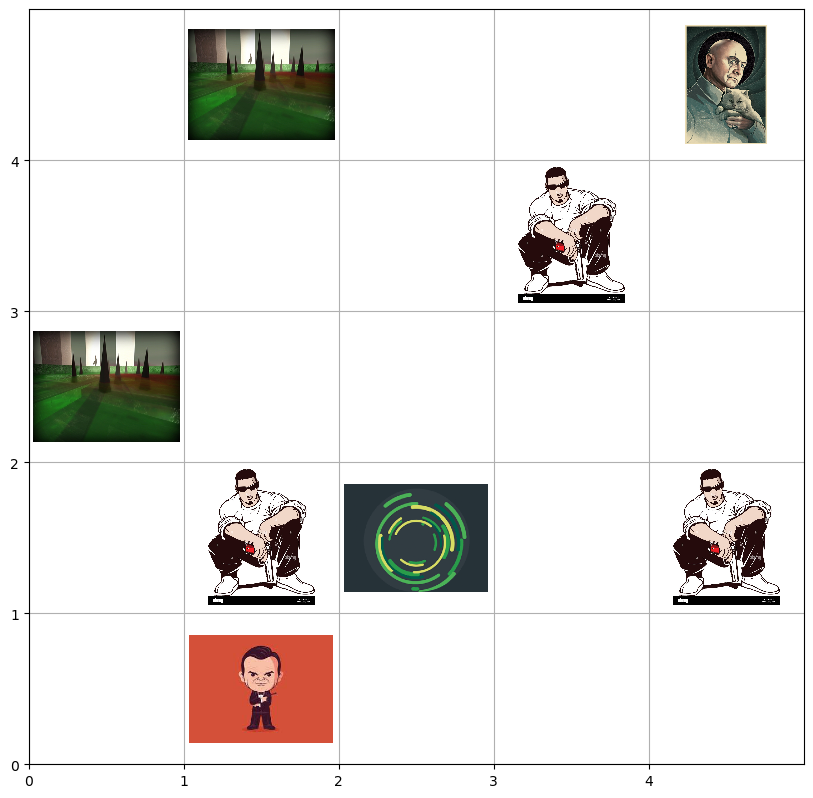

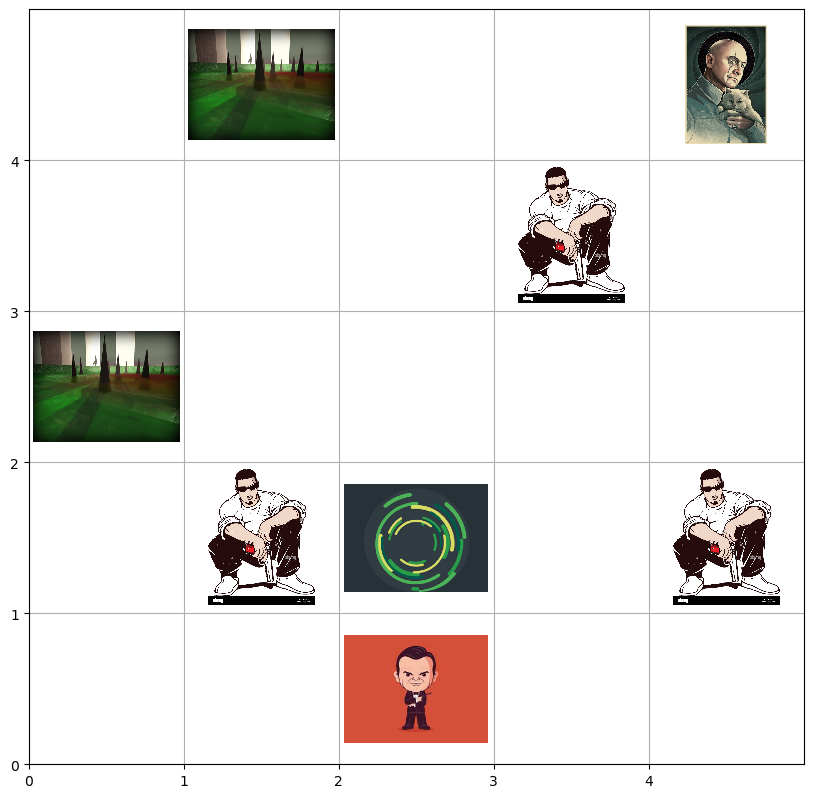

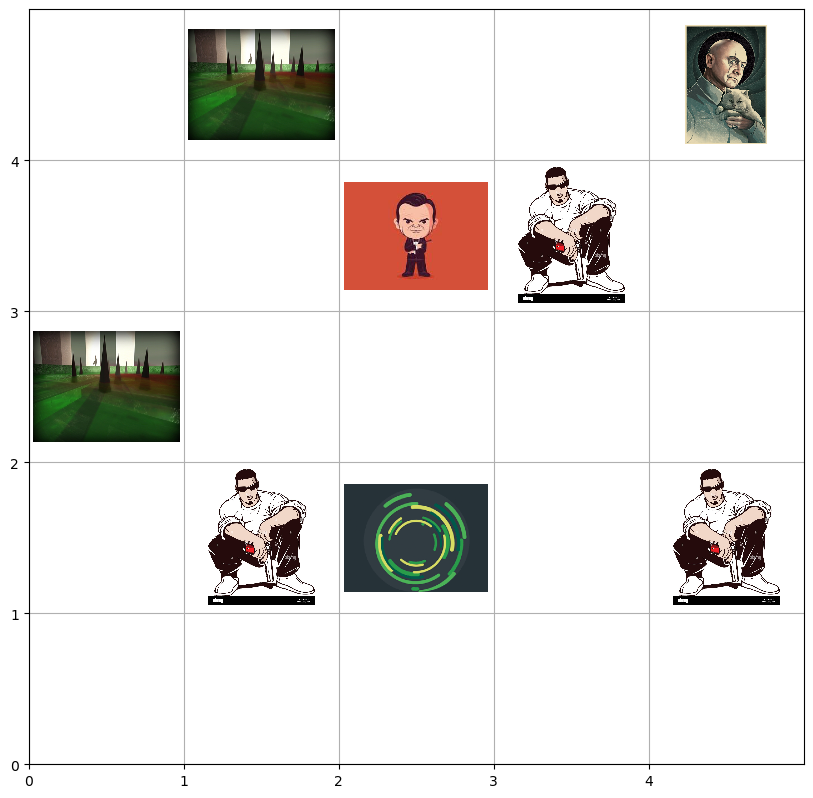

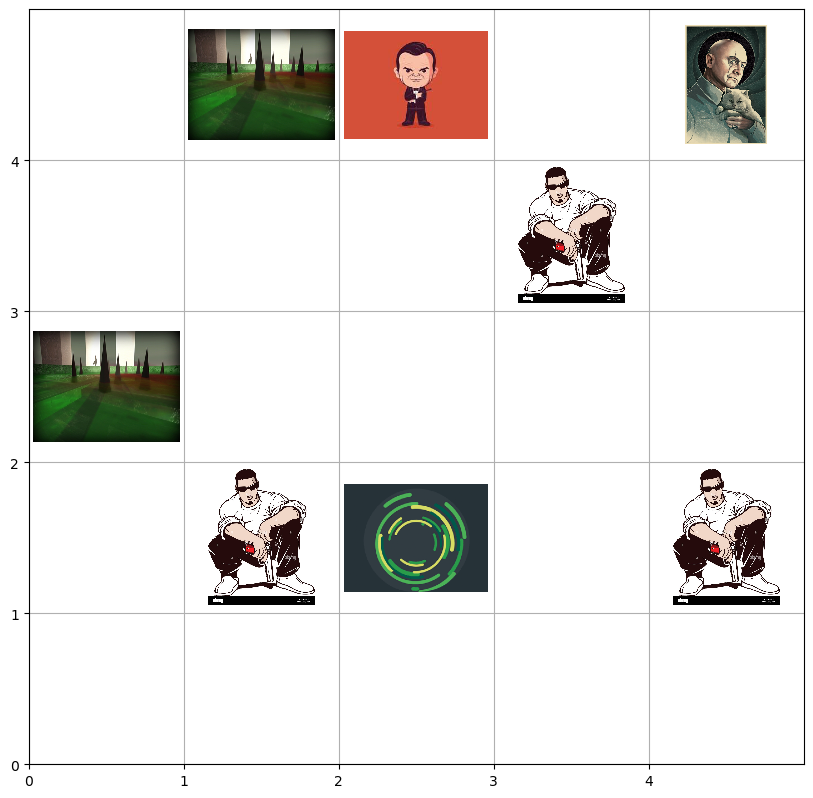

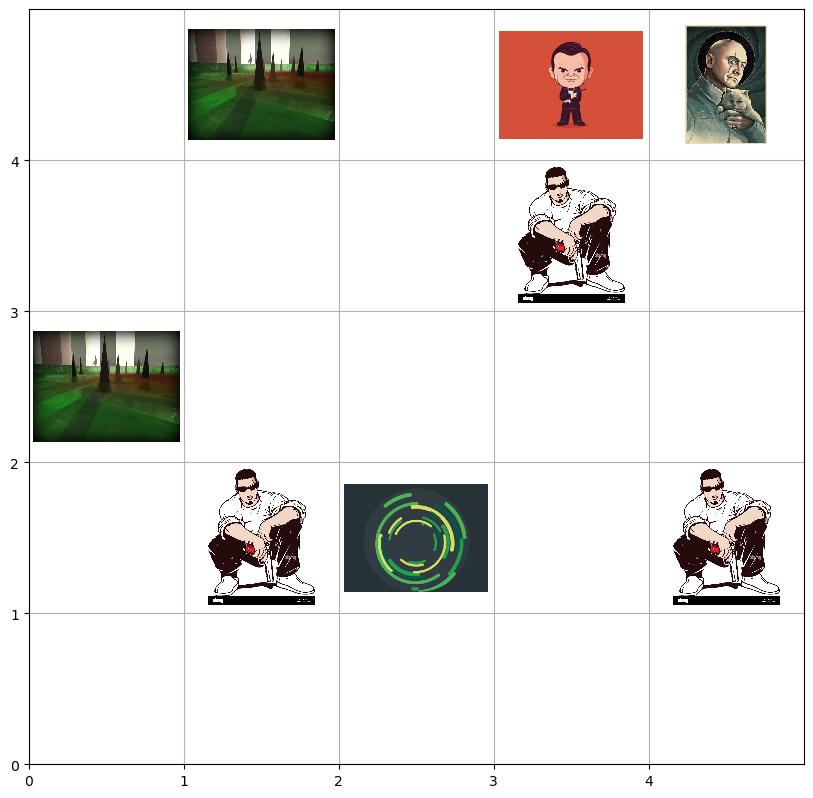

In [33]:
def qLearning_deterministic():
    env = GridEnvironmentDeterministic()
    assert type(env.observation_space) == spaces.Discrete, "Must have discrete state space"
    assert type(env.action_space)==spaces.Discrete, "Must have discrete action space"

    agent = Agent(env.observation_space.n, env.action_space.n)

    r,t,e = Qtrainer(env, agent, iters=30, gamma=0.99, alpha=0.3, epsilon=0.2)
    plot(r,t,e,filename="output_images/q-learning-deterministic.png")
    print(agent.q_func)
    s = env.reset()
    while True:
        env.render()
        a = agent.act(s)
        s,r,d,i = env.step(a)
        if d:
            break
    return r

qd = qLearning_deterministic()

#### Stochastic Q-learning

[[ -2.52815305  -1.98532981  39.15880884  -2.15181312  -2.01389606]
 [-14.45788522   8.33856618 -11.02002692  -2.37495063  -2.58058013]
 [  0.           0.           0.           0.           0.        ]
 [ -0.9378327   -6.69208235  -1.12227209  -0.8973027   -0.955029  ]
 [ -0.8973027   -1.06101851  -6.73803566  -0.8973027   -0.8973027 ]
 [ -6.3         -0.8973027   43.04777663   1.20023211  -1.16391851]
 [  0.           0.           0.           0.           0.        ]
 [ -0.6879327   -6.4779327   -0.66625421  -6.73179976  -0.5991    ]
 [ -6.77815838  -1.027059    -1.18954981  -1.04577     -1.19461079]
 [  0.           0.           0.           0.           0.        ]
 [ 45.47424822  -0.3         -0.3         -0.75511875  -0.3319908 ]
 [  0.           0.           0.           0.           0.        ]
 [ -0.3891      -0.14136465  -0.3         -0.51        -0.3       ]
 [ 45.41991255  -1.46273998 -14.69569533  -1.47662853   4.46174314]
 [ -0.80847     -1.10079633  46.46083897  -6.763

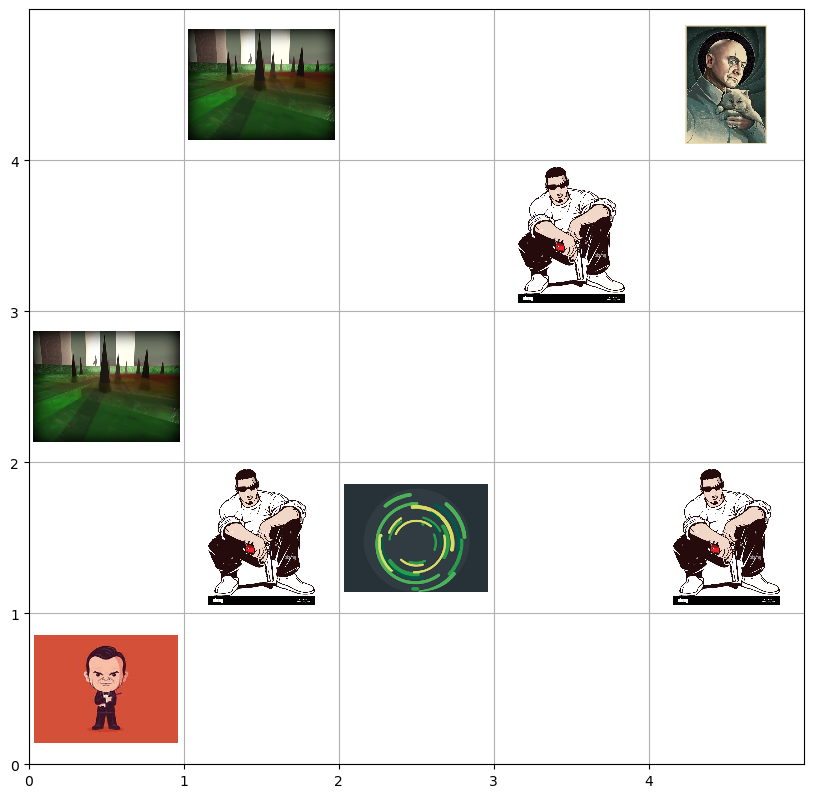

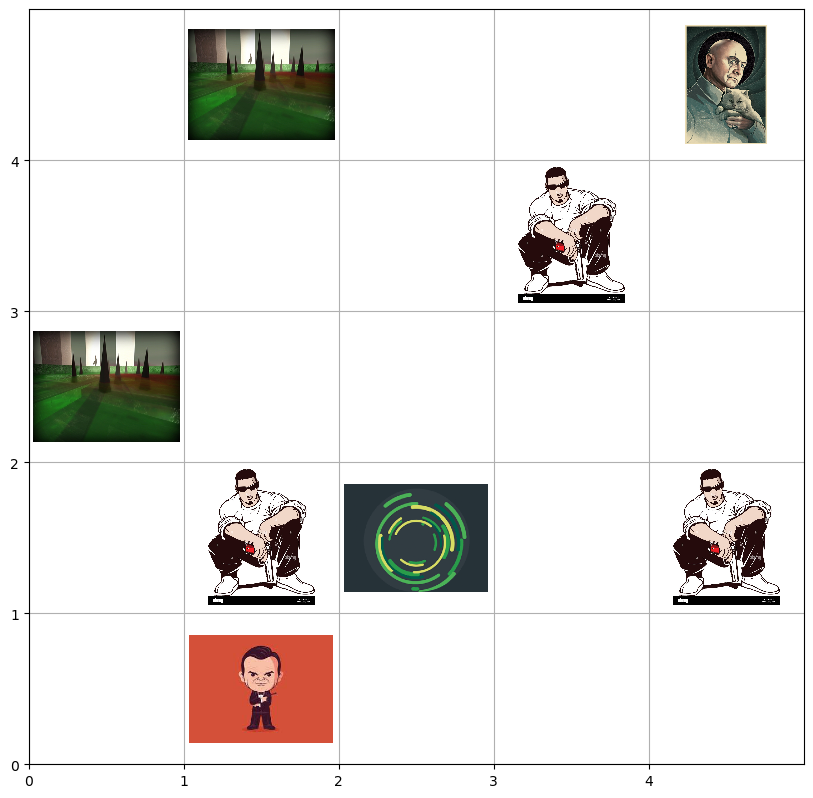

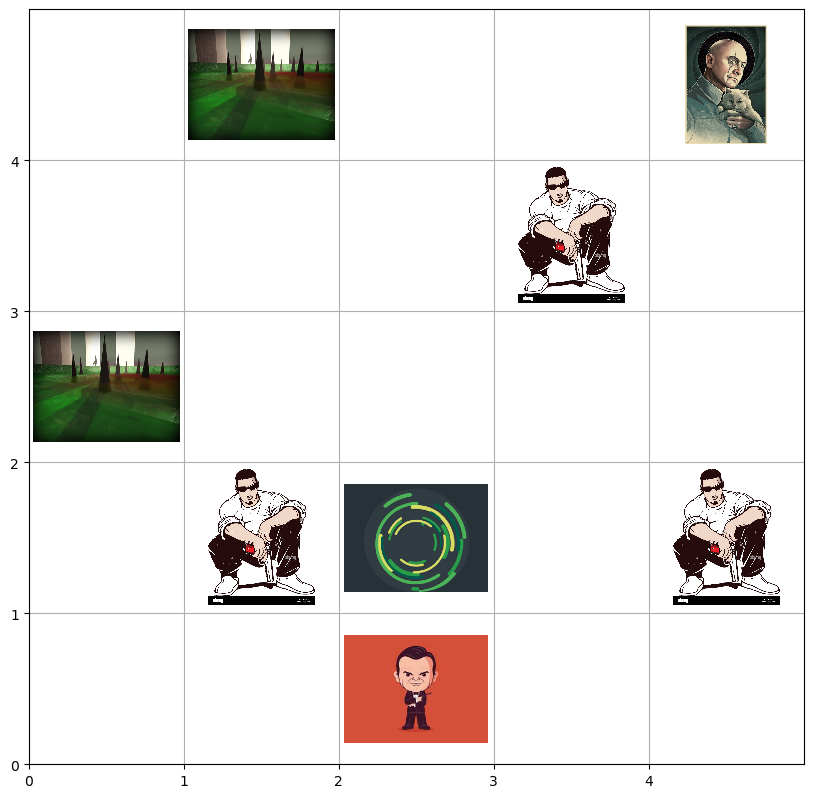

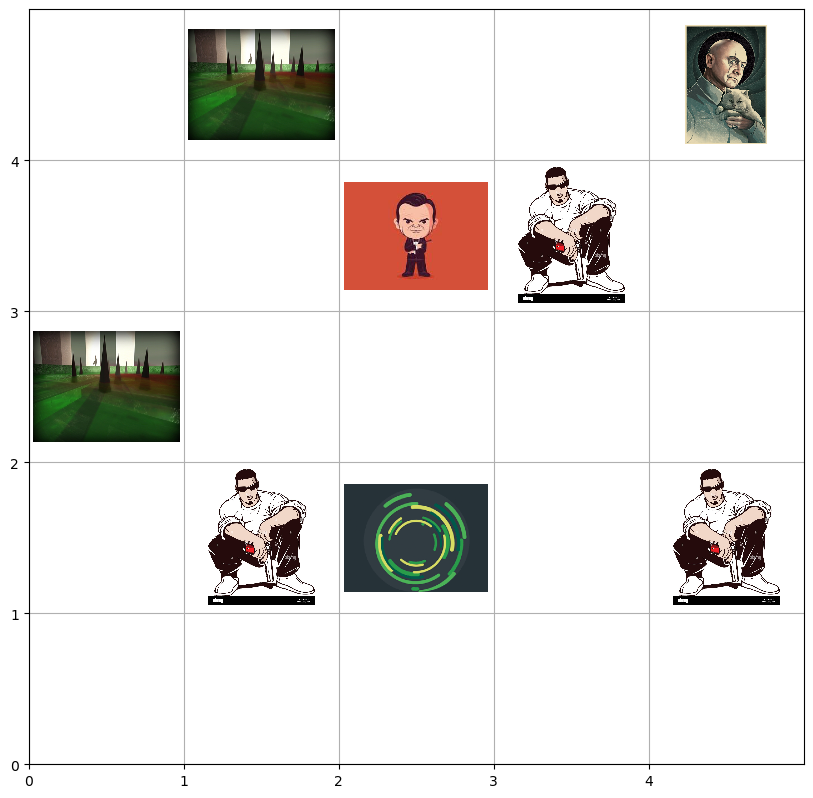

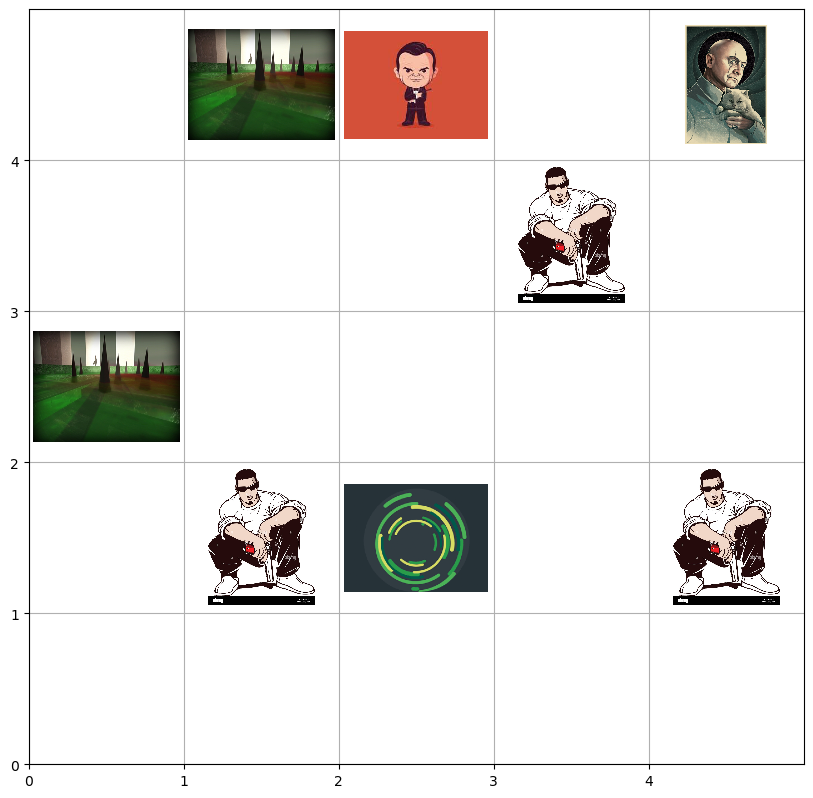

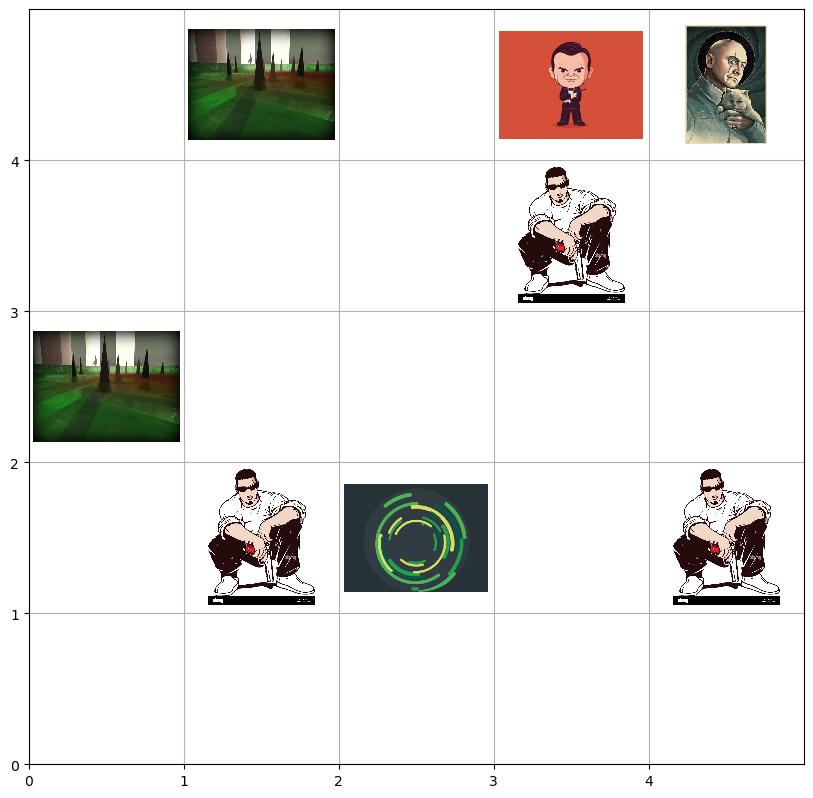

In [24]:
def qLearning_stochastic():
    env = GridEnvironmentStochastic()
    assert type(env.observation_space) == spaces.Discrete, "Must have discrete state space"
    assert type(env.action_space)==spaces.Discrete, "Must have discrete action space"

    agent = Agent(env.observation_space.n, env.action_space.n)

    r,t,e = Qtrainer(env, agent, iters=30, gamma=0.99, alpha=0.3, epsilon=0.2)
    plot(r,t,e,filename="output_images/q-learning-stochastic.png")
    print(agent.q_func)
    s = env.reset()
    while True:
        env.render()
        a = agent.act(s)
        s,r,d,i = env.step(a)
        if d:
            break
    return r
qs = qLearning_stochastic()

### SARSA

In [26]:
def SARSAtrainer(env, agent, iters=1000, gamma=0.9, alpha=0.3, epsilon=0.1):
    rewards = []
    train_rewards = []
    epsilons = []
    epsilon_decay = 0.9
    epsilon_min = 0.01
    for i in range(iters):
        total_rew = 0
        st = env.reset()
        act = agent.act(st, epsilon)
        while True:
            nxt_st, rew, done, _ = env.step(act)
            nxt_act = agent.act(nxt_st, epsilon)
            target = rew + gamma*agent.q_func[nxt_st][nxt_act]*(1-done)
            agent.q_func[st][act] += alpha * (target - agent.q_func[st][act])
            act = nxt_act
            st = nxt_st
            total_rew += rew
            if done:
                break
        train_rewards.append(total_rew)
        if (i%1==0):
            r,l=evaluate(env,agent,10)
            rewards.append(r)
            epsilons.append(epsilon)
            epsilon = max(epsilon*epsilon_decay, epsilon_min)
    
    return rewards, train_rewards, epsilons

#### Deterministic SARSA

[[ -4.85502642  -4.95294698  -4.96201259  13.48535892  -4.29959379]
 [ -4.06879973 -11.94229442  -3.92101584 -10.98354591  -4.04065598]
 [  0.           0.           0.           0.           0.        ]
 [ -6.78647365  -0.51        -0.5991      -0.3891      -0.80847   ]
 [ -0.3         -0.3         -0.3         -7.27959268  -0.3       ]
 [ -4.16333222 -14.83677609  -4.09037295  22.242814    -4.46937207]
 [  0.           0.           0.           0.           0.        ]
 [ -6.85988118  -0.66147     -6.3         -0.45147     -0.51      ]
 [ -0.51       -11.88162642  -0.7461      -1.4753702   -3.02869404]
 [  0.           0.           0.           0.           0.        ]
 [ -3.33295276  -3.46635819  -4.64673596  31.68274186  -2.99654521]
 [  0.           0.           0.           0.           0.        ]
 [ -0.52710961  -1.54046699  -0.7461      -0.7461      -1.1055396 ]
 [ -1.41662434  45.54554088  -1.67189307 -17.28180225  -2.16791451]
 [ -1.21342401  -0.80847     -6.61059369  47.433

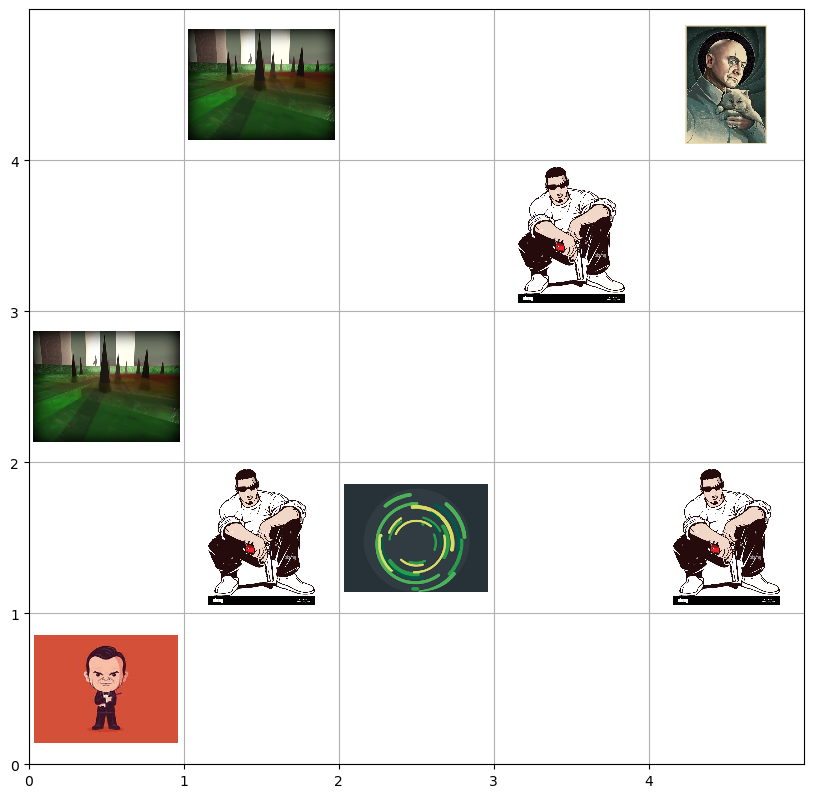

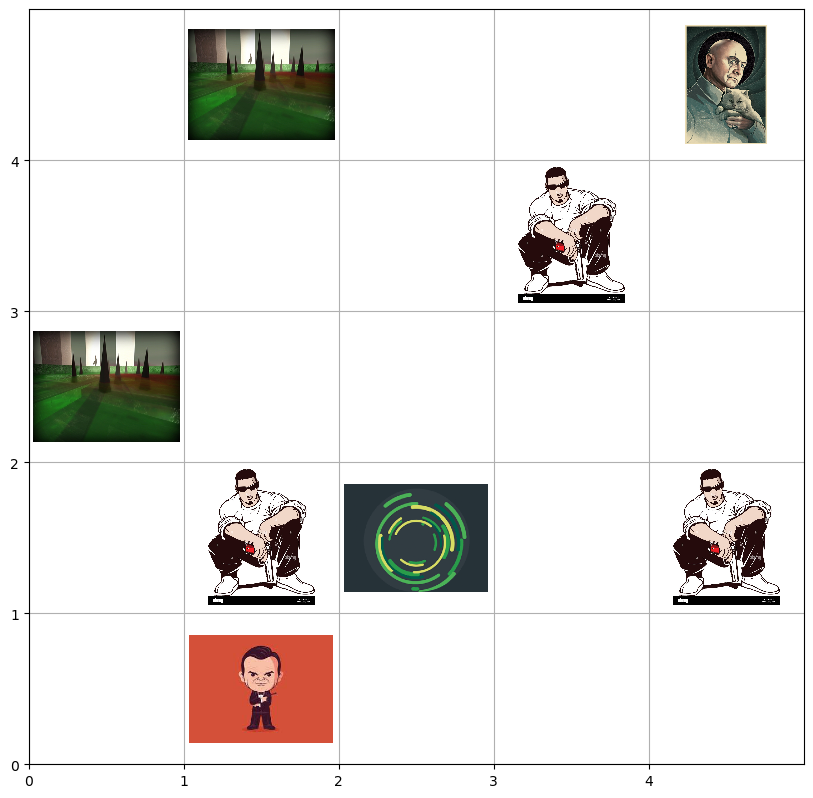

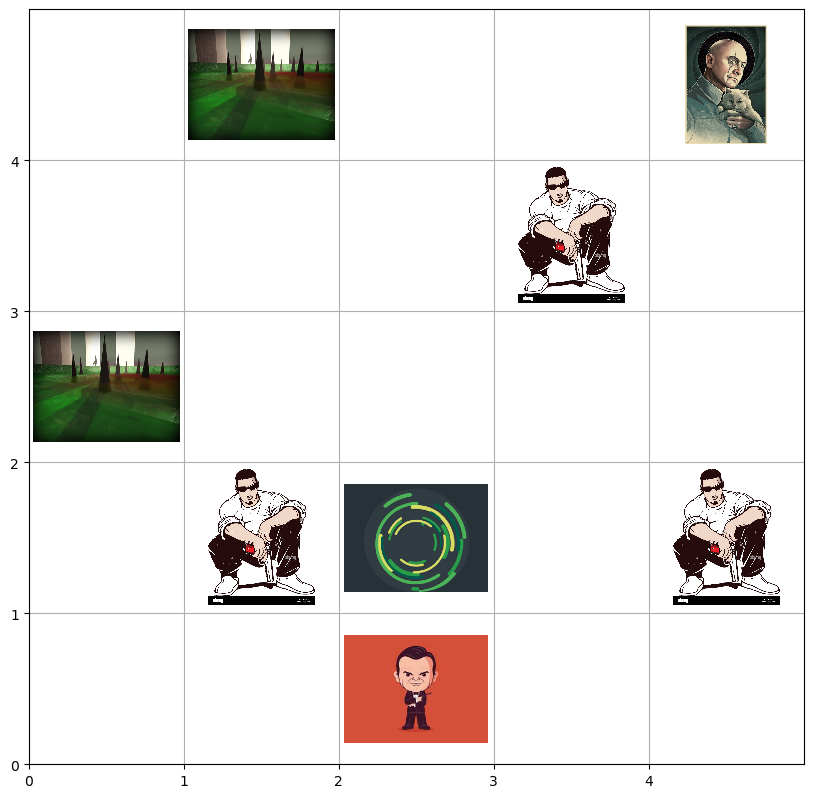

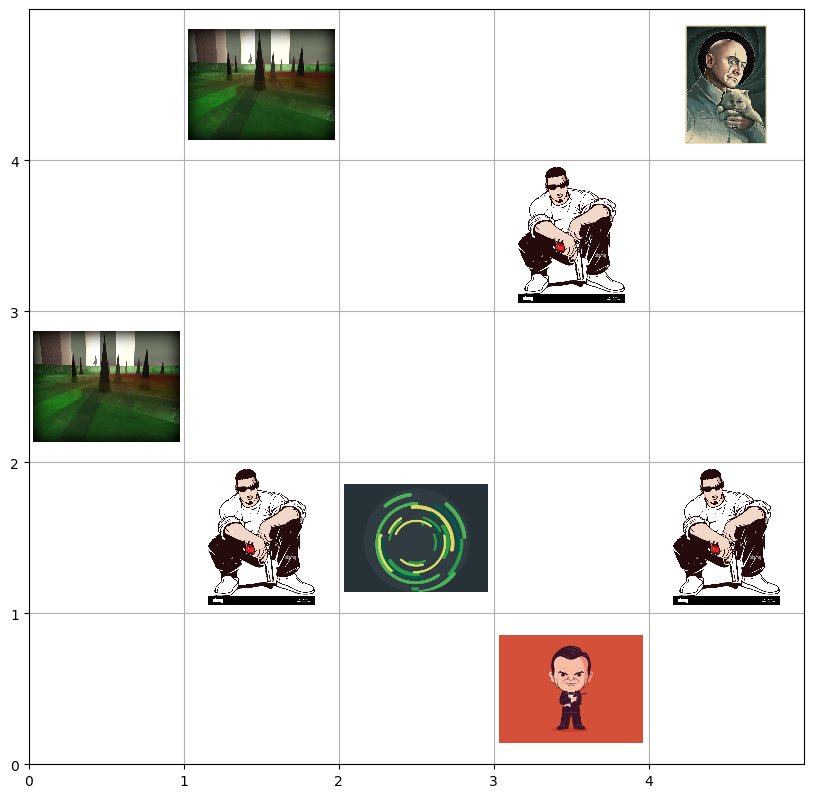

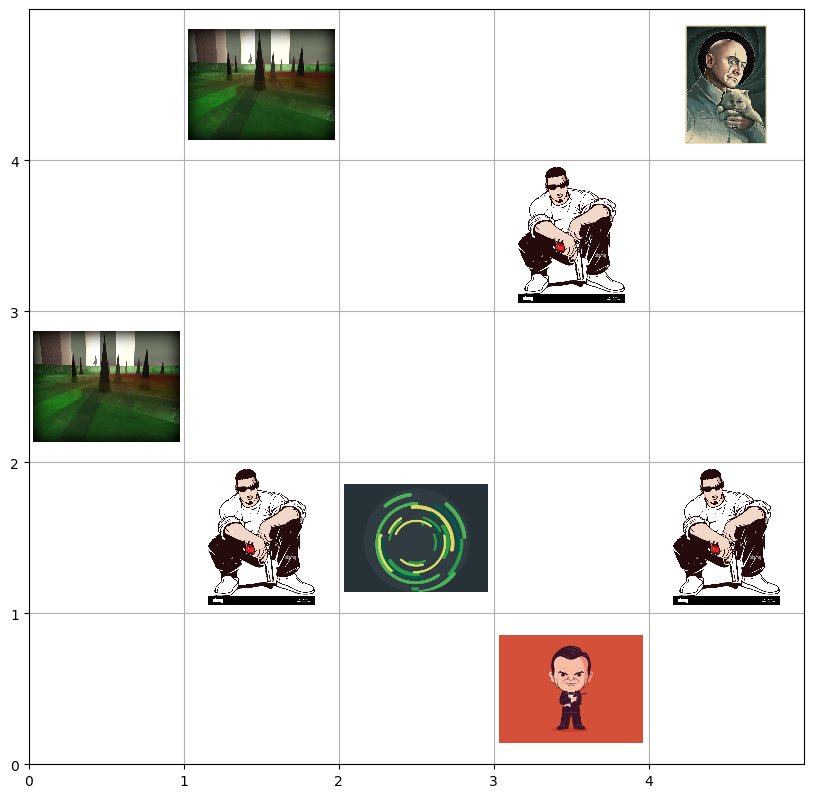

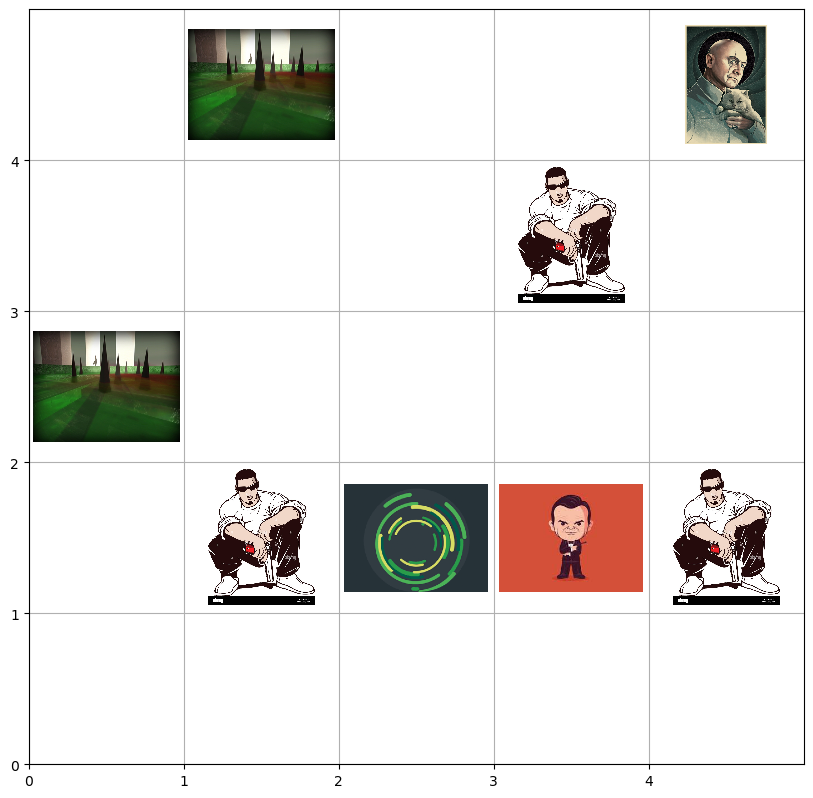

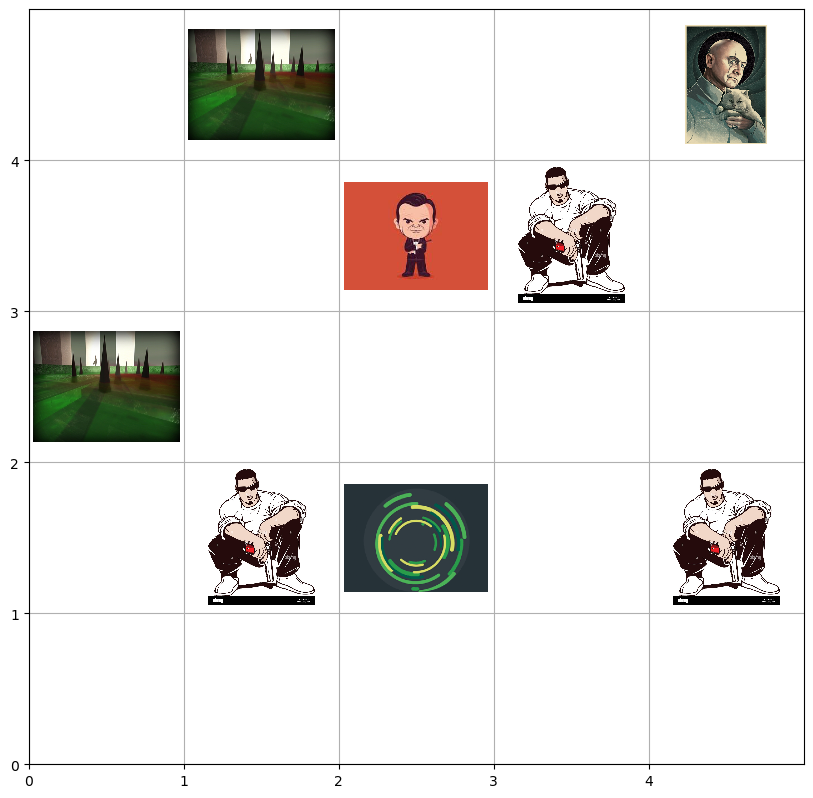

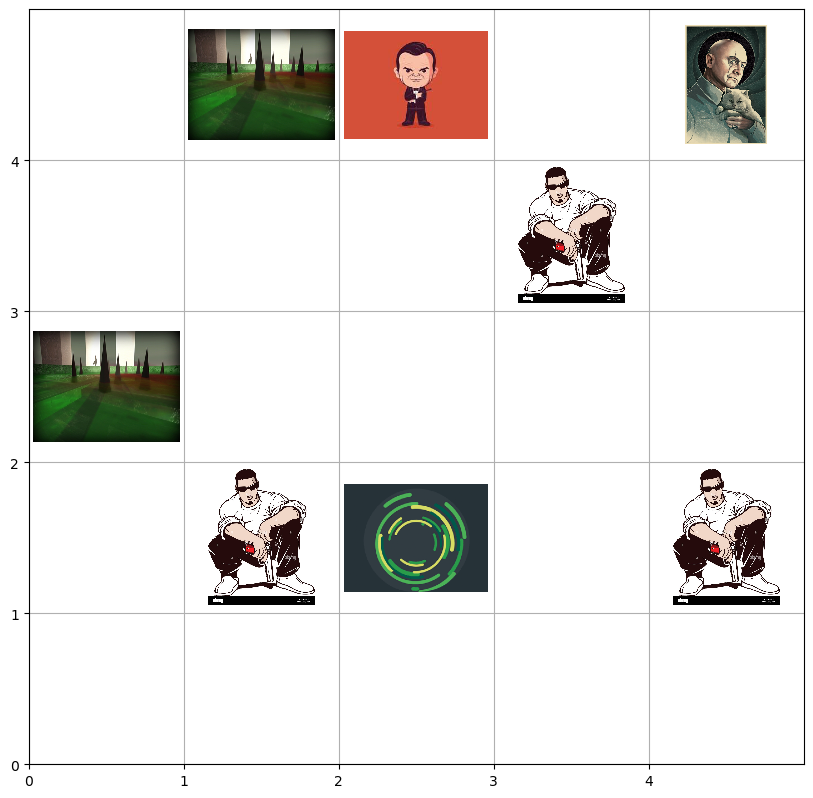

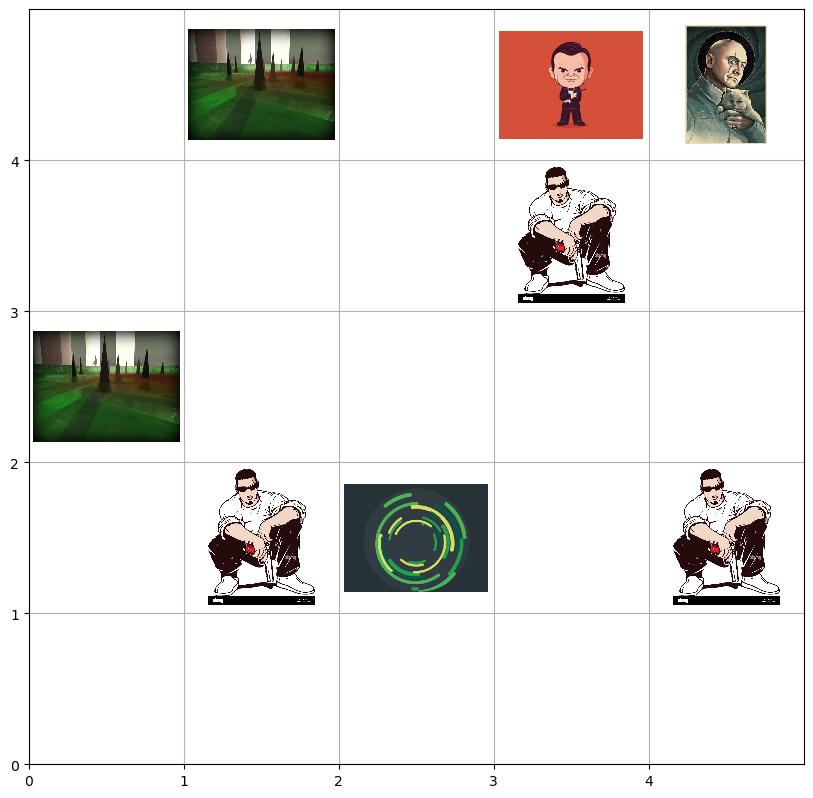

In [27]:
def sarsa_deterministic():
    env = GridEnvironmentDeterministic()
    assert type(env.observation_space) == spaces.Discrete, "Must have discrete state space"
    assert type(env.action_space)==spaces.Discrete, "Must have discrete action space"

    agent = Agent(env.observation_space.n, env.action_space.n)

    r,t,e = SARSAtrainer(env, agent, 30, gamma=0.99, alpha=0.3, epsilon=0.2)
    plot(r,t,e,filename="output_images/sarsa-deterministic.png")
    print(agent.q_func)
    s = env.reset()
    while True:
        env.render()
        a = agent.act(s)
        s,r,d,i = env.step(a)
        if d:
            break
    return r
sd = sarsa_deterministic()

#### Stochastic SARSA

[[ -4.88382367  -5.33167223  34.4374419   -4.91180695  -5.19293804]
 [-15.01514269  -5.17026527  -6.4155627   -5.14983707  -5.92135873]
 [  0.           0.           0.           0.           0.        ]
 [ -0.3         -6.83391596   0.          -0.3          0.        ]
 [ -0.51         0.          -6.74101589  -0.3         -0.51      ]
 [-14.56189178  -1.55004182  40.32691871  -1.26725483  -1.94036061]
 [  0.           0.           0.           0.           0.        ]
 [  0.           0.          -0.657       -6.62350954   0.        ]
 [ -6.75557979  -0.66147     -0.91535123  -0.51        -0.5991    ]
 [  0.           0.           0.           0.           0.        ]
 [ 44.56608943  -0.65194805  -0.51        -0.50981761  -0.51      ]
 [  0.           0.           0.           0.           0.        ]
 [ -0.3          0.07180844  -0.3         -0.3891      -0.48986439]
 [ 45.27270293  -1.03474745 -11.96049538  -1.15776129  -3.07381588]
 [ -0.80847     -0.7461      47.20245611  -6.752

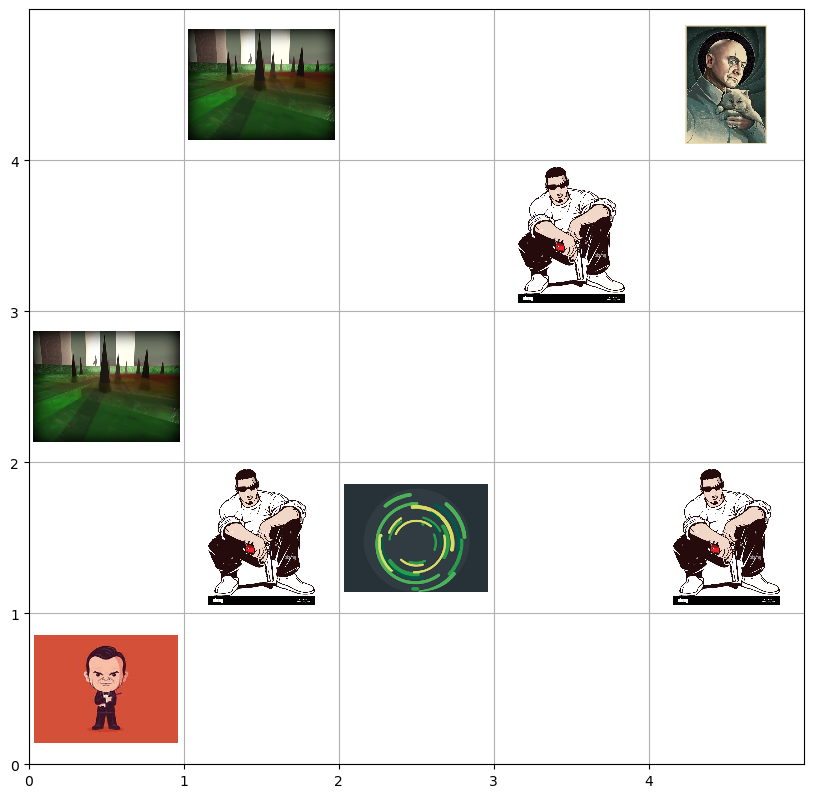

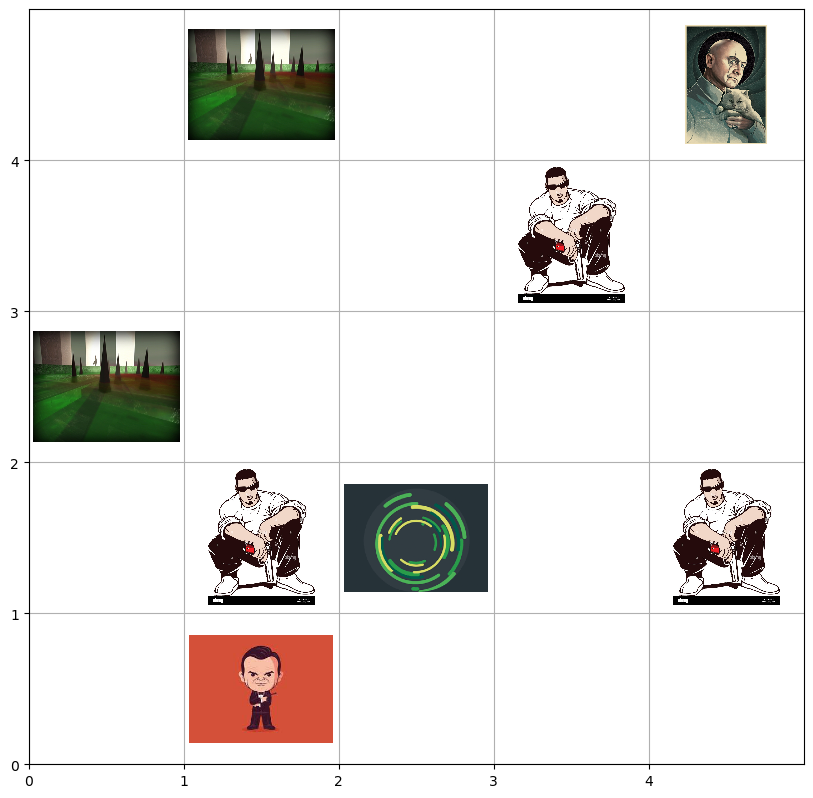

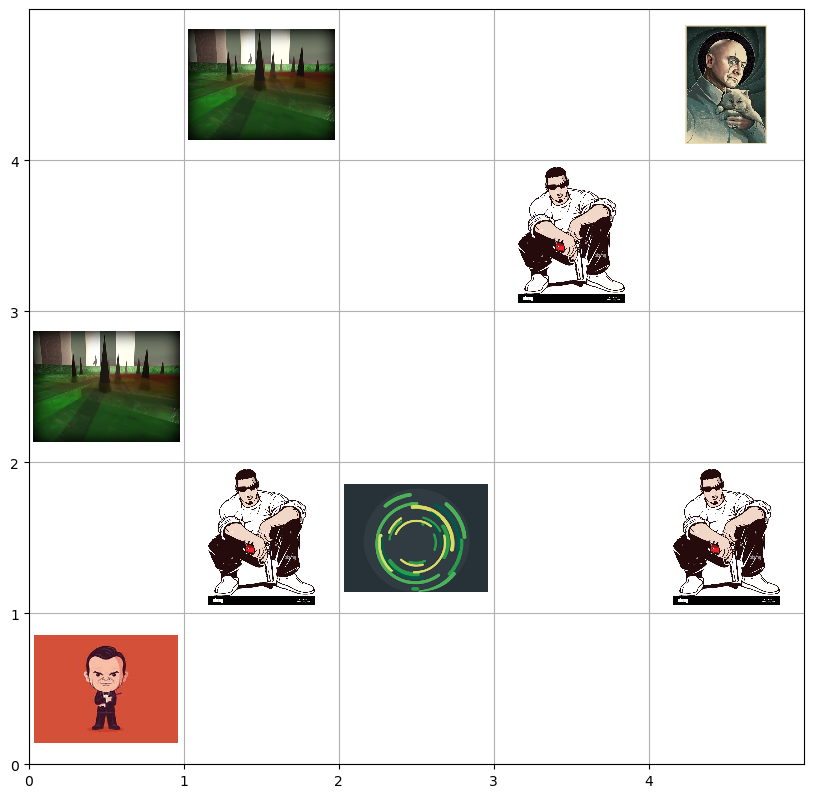

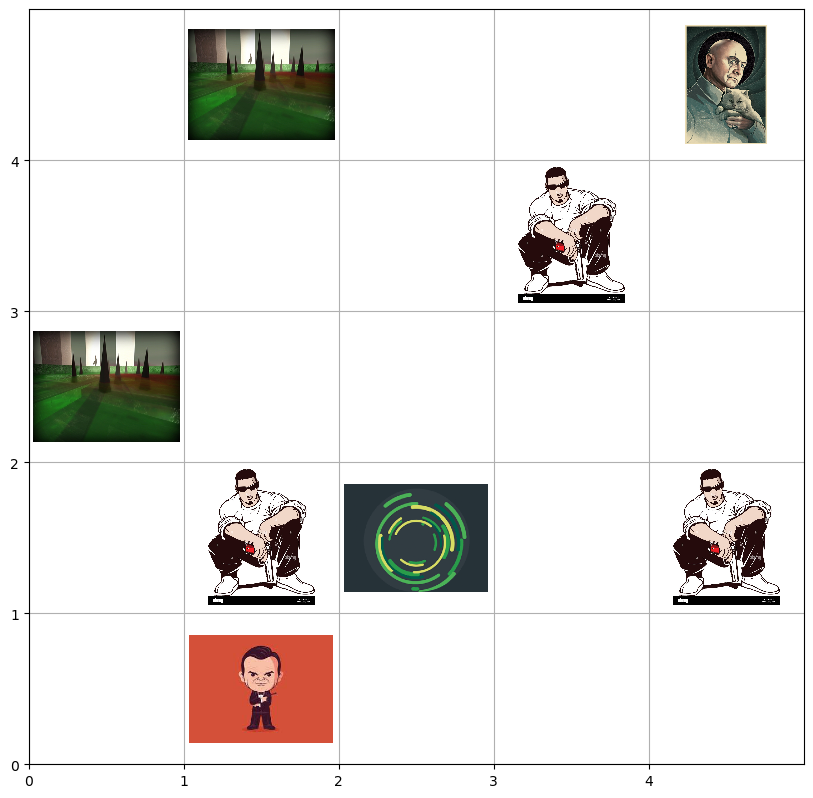

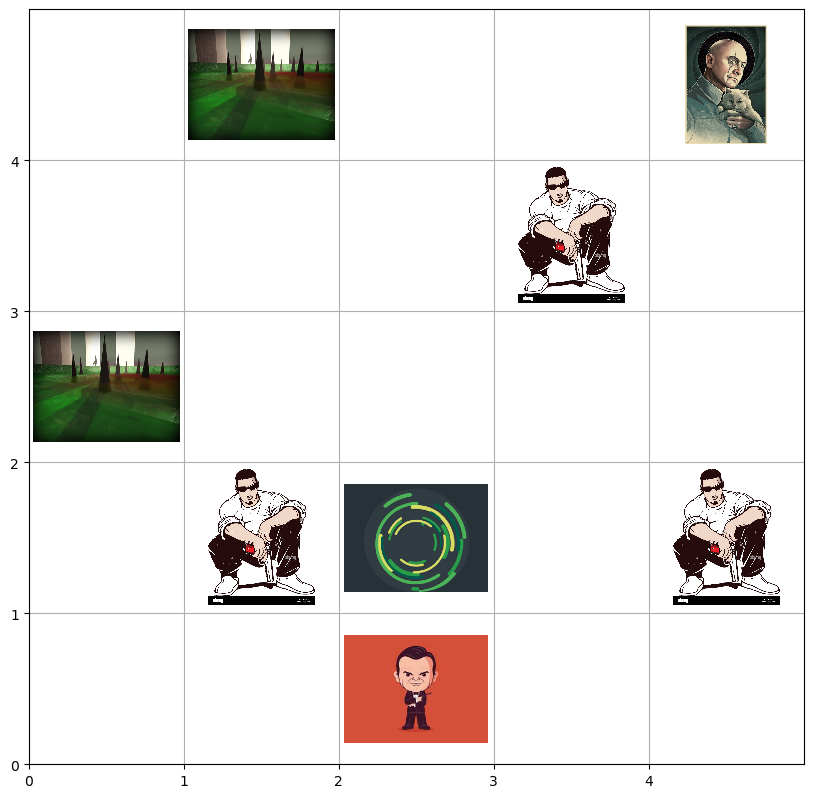

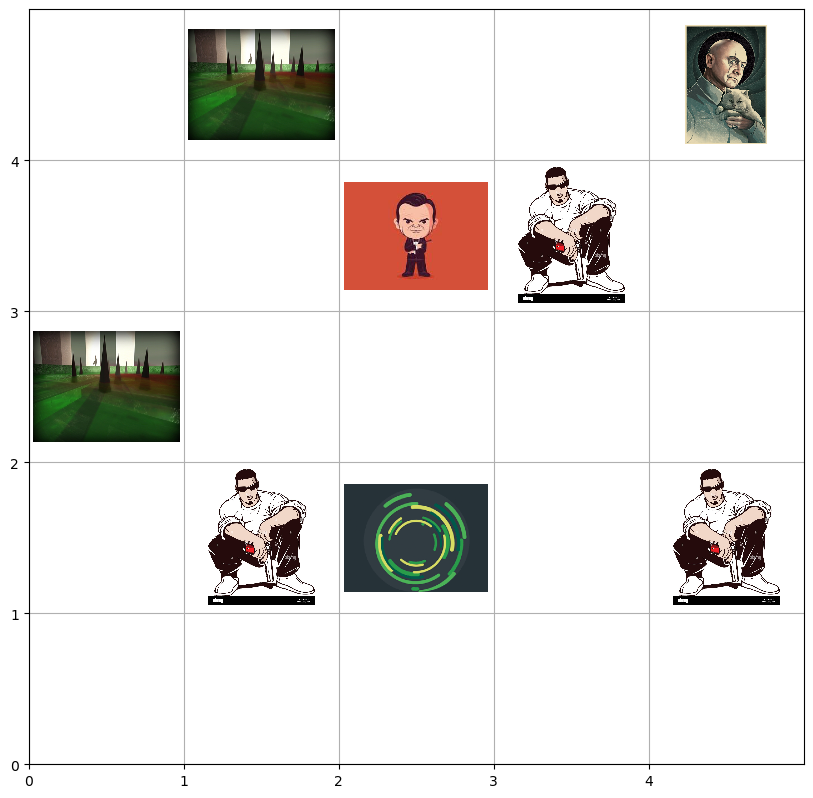

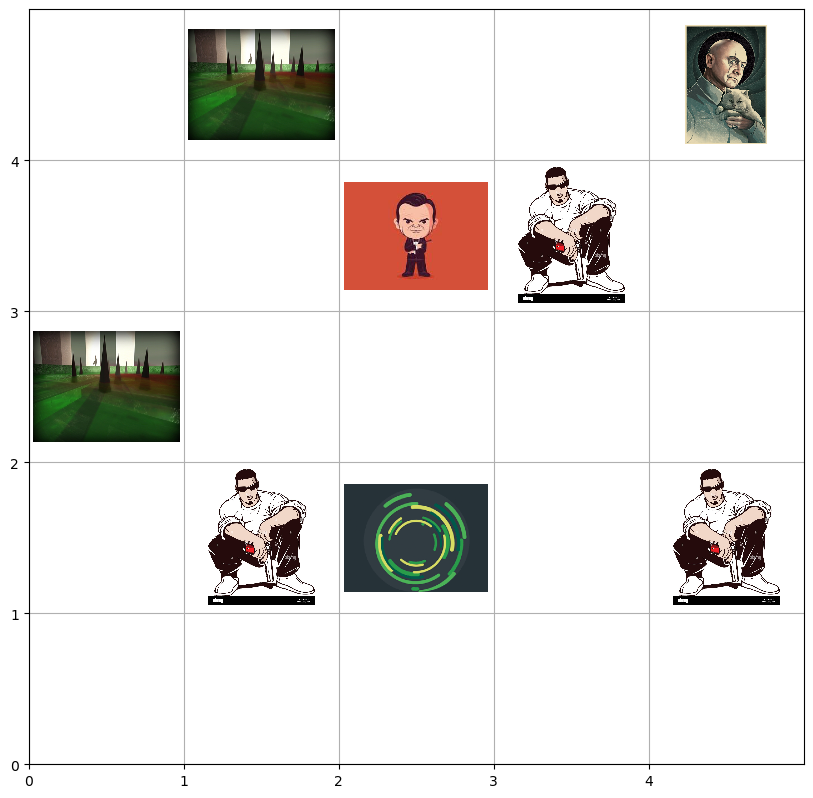

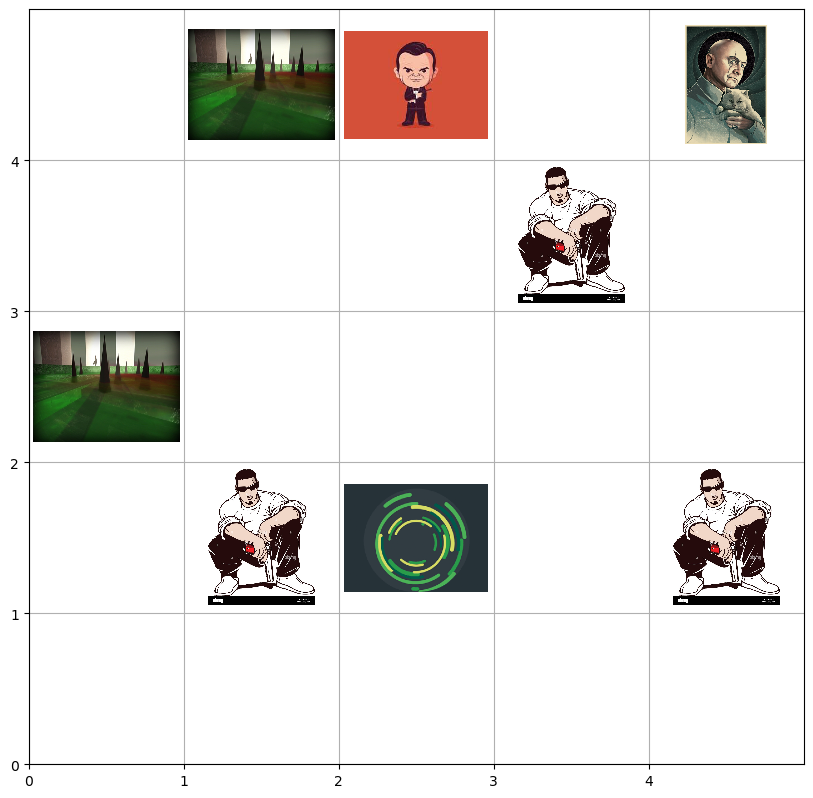

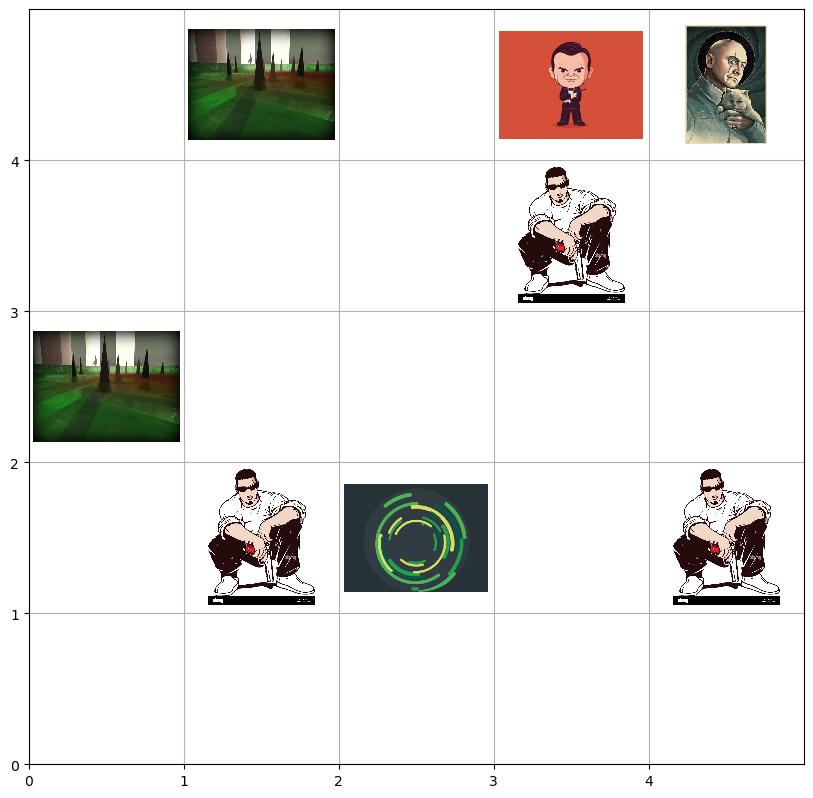

In [28]:
def sarsa_stochastic():
    env = GridEnvironmentStochastic()
    assert type(env.observation_space) == spaces.Discrete, "Must have discrete state space"
    assert type(env.action_space)==spaces.Discrete, "Must have discrete action space"

    agent = Agent(env.observation_space.n, env.action_space.n)

    r,t,e = SARSAtrainer(env, agent, 30, gamma=0.99, alpha=0.3, epsilon=0.2)
    plot(r,t,e,filename="output_images/sarsa-stochastic.png")
    print(agent.q_func)
    s = env.reset()
    while True:
        env.render()
        a = agent.act(s)
        s,r,d,i = env.step(a)
        if d:
            break
    return r
ss = sarsa_stochastic()

### Generating result plots for comparison

In [17]:
def plot_comparison(rewards1, rewards2, filename="output_images/demo.png"):
    x = np.arange(len(rewards1))
    plt.rcParams['figure.figsize'] = [5, 5]
    plt.rcParams['figure.dpi'] = 100
    plt.plot(x, rewards1, label="Q-Learning")
    plt.plot(x, rewards2, label="SARSA")
    plt.xlabel("Rollout Episodes")
    plt.title("Q-Learning vs SARSA evaluation")
    plt.legend()
    plt.savefig(filename)
    plt.close()

plot_comparison(qd, sd, filename="output_images/deterministic_comparions.png")
plot_comparison(qs, ss, filename="output_images/stochastic_comparions.png")


"I certify that the code and data in this assignment were generated independently, using only the tools
and resources defined in the course and that I did not receive any external help, coaching or contributions
during the production of this work."